<center><h1>Is America’s Glass Half-Empty? Discovering drivers of America’s prospective thinking.</center>


#### Authors: <a href="https://github.com/Alexia-Garces">Alexia Garces</a>, <a href="https://github.com/Brooke-Holyoak">Brooke Holyoak</a>, <a href="https://github.com/CharlesAtchison">Charles Atchison</a>, <a href="https://github.com/Jason-Tellez">Jason Tellez</a>, <a href="https://github.com/malachi-hale">Malachi Hale</a>

<a name ='toc'></a>
# Table of Contents 
1. [Project Planning](#project_planning)
    1. [Project Objectives](#project_objectives)
    2. [Business Goals](#business_goals)
    3. [Audience](#audience)
    4. [Deliverables](#deliverables)
2. [Executive Summary](#exe_sum)
    1. [Goals](#goals)
    2. [Findings](#findings)
3. [Import Required Modules](#imports)
3. [Acquire Data](#acquire)
    1. [Working with American Trends Panel Data](#working_with_data)
    2. [Data Dictonary](#data_dict) 
    3. [Acquire Takeaways](#acquire_takeaways)
4. [Prepare Data](#prepare)
    1. [Data Attributes](#data_attributes)
    2. [Prepare Takeaways](#prepare_takeaways)
5. [Data Exploration](#explore)
    1. [Hypothesis & Testing](#hypotheses)
    2. [Explore Takeaways](#explore_takeaways)
6. [Modeling & Evaluation](#modeling)
    1. [Baseline](#baseline)
    2. [Decision Tree](#decision_tree)
    3. [Random Forest](#random_forest)
    4. [K Nearest Neighbors](#knn)
    5. [Other Models](#other_models)
    6. [Feature Importance](#feature_importance)
    7. [Modeling with just the top features](#top)
    9. [Model Comparison](#model_comparison)
    10. [Out of Sample Testing](#out_of_sample)
    11. [Modeling Takeaways](#modeling_takeaways)
7. [Project Delivery](#delivery)
    1. [Conclusion & Next Steps](#conclusion_and_next_steps)
    2. [Project Replication](#replicate)
    3. [Data Use Agreements](#data_use)

<hr style="border-top: 10px groove tan; margin-top: 5px; margin-bottom: 5px"></hr>

<a name='project_planning'></a>
# Project Planning
✓ 🟢 **Plan** ➜ ☐ _Acquire_ ➜ ☐ _Prepare_ ➜ ☐ _Explore_ ➜ ☐ _Model_ ➜ ☐ _Deliver_

<a name='project_objectives'></a>
## Project Objectives 
> - Utilize American Trends Panel Datasets (downloadable <a href="https://www.kaggle.com/shankanater/american-trends-panel-pewresearch/download">here</a>), with statistical modeling techniques to assess and attempt to predict sentiment toward particular topics.
> - This will culminate into a well-built well-documented jupyter notebook that contains our process and derivation of these predictions.
> - Modules will be created that abstract minutiae aspects of the data pipeline process.

<a name='business_goals'></a>
## Business Goals 
> - Utilize tabulated statistical data aquired from Pew Research American Trends Surveys.
> - Prepare, explore and formulate hypthoesis about the data.
> - Build models that can predict future American sentiment toward certain topics, and utilize hyperparameter optimization and feature engineering to improve validation model performance prior to evaluating on test data.
> - Document all these steps throughly.

<a name='audience'></a>
## Audience 
> - General population and individuals without specific knowledge or understanding of the topic or subject.

<a name='deliverables'></a>
## Deliverables
> - A clearly named final notebook. This notebook will contain more detailed processes other than noted within the README and have abstracted scripts to assist on readability.
> - A `README.md` that explains what the project is, how to reproduce the project, and notes about the project.
> - A Python module and associated modules that automate the data acquisition and preparation process. 

<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>


<a name='exe_sum'></a>
# Executive Summary
> - Our team acquired Pew Research Panel survey data and utilized this data to explore the drivers of pessimism in American Prospective Attitudes.
> - Being able to understand what most likely drives pessimistic or optimistic thinking about the future will help business leaders clarify strategies for moving foward.
> - This project will also help guide expectations of future sucess in the customers these business leaders serve, in addition to the products offered, investment, marketing and sales, and other aspects throughout their organization. 

<a name='goals'></a>
## Goals
> - Build a model that can predict future American sentiment toward certain topics, utilizing split survey data as the training dataset.

<a name='findings'></a>
## Findings
> - Standard demographic features like age, sex, and income are not drivers of overall pessimism. However, features like what will happen to the average family's standard of living, cost of healthcare, and the future of the public education system are highly correlated to overall pessimism.

<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>


<a name='imports'></a>
# Import Required Modules

In [1]:
import pandas as pd

#set seaborn color pallete
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('plasma')
pal = sns.set_palette('plasma')

# This module displays Markdown and helps with visability within Juypter Notebooks
from IPython.display import Markdown, display, HTML

# Import models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Import Metrics
from sklearn.metrics import (
    classification_report, confusion_matrix,
    recall_score, plot_confusion_matrix)

#Disable Warnings 
import warnings
warnings.filterwarnings('ignore')

#Import functions
import acquire as a
import prepare as p
import explore as e
import model as m 

<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

<a name='acquire'></a>
# Acquire Data
✓ _Plan_ ➜ 🟢 **Acquire** ➜ ☐ _Prepare_ ➜ ☐ _Explore_ ➜ ☐ _Model_ ➜ ☐ _Deliver_

> - Check if the "ATP W41.sav" Statistical SPSS file is within the current directory.
> - If the data is not present within the current directory, you can download it from <a href="https://www.kaggle.com/shankanater/american-trends-panel-pewresearch/download">here</a> 
> - If the data is present, read the data into a Pandas DataFrame and return the data as `atp_df`.


<a name="working_with_data"></a>
## Working with American Trends Panel Data 

### Demographic Profile Variables
> Each ATP dataset comes with a number of variables prefixed by “F_” (for “frame”) that contain demographic profile data. These variables are not measured every wave; instead, they are sourced from panel profile surveys conducted on a less frequent basis. Some profile variables are also occasionally asked on panel waves and are accordingly updated for each panelist. Profile information is based on panelists’ most recent response to the profile questions. Some variables are coarsened to help protect the confidentiality of our panelists. Interviewer instructions in `[ ]` and voluntary responses in `( )` are included if the source of a profile variable was ever presented in phone (CATI) mode. See Appendix I for the profile variable codebook.

###  Unique Identifier
> The variable `QKEY` is a unique identifier assigned to each respondent. `QKEY` can be used to link multiple panel waves together. Note that except in a few instances, `WEIGHT_W41` are only provided for single waves. Use caution when analyzing data from multiple waves without weights that are designed for use with multiple waves.

### Data Variable Types
 > American Trends Panel datasets contain single-punch or multi-punch variables. For questions in a 'Check all that apply' format, each option has its own variable indicating whether a respondent selected the item or not. For some datasets there is an additional variable indicating whether a respondent did not select any of the options. Open-end string variables are not included in ATP datasets. Coded responses to open-end questions are included when available.

### Dataset Format
> The dataset is formatted as a .sav file and can be read with the SPSS software program. The dataset can also be read with the R programming language, using the `foreign` package. R is a free, open-source program for statistical analysis that can be downloaded <a href="https://cran.r-project.org/">here</a>. It can also be used to export data in .csv format for use with other software programs.

> **NOTE**: Using other tools to directly convert the .sav file to another format such as .csv may ERASE value
labels. For this reason, it is highly recommended that you use either SPSS or R to read the file directly.


In [2]:
# get atp_w41_spss data
atp_df = a.get_atp_w41_spss_data()
# Inspect the truncated dataframe
atp_df.head()

,QKEY,NEW_Device_Type_W41,F_LANGUAGE,FORM_W41,OPTIMIST_W41,AVGFAM_W41,HAPPENa_W41,HAPPENb_W41,HAPPENc_W41,HAPPENd_W41,...,F_PARTY_FINAL,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_INCOME,F_INCOME_RECODE,F_REG,F_IDEO,F_INTUSER,F_VOLSUM,WEIGHT_W41
0,100363.0,Mobile phone,English,Form 1,Somewhat optimistic,Get worse,The U.S. economy will be STRONGER,Health care will be MORE affordable,Race relations will IMPROVE,The U.S. will be MORE important in the world,...,Democrat,NaN,Dem/Lean Dem,"$100,000 to less than $150,000","$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Internet User,No,0.599006
1,101224.0,Mobile phone,English,Form 1,Somewhat optimistic,Get better,The U.S. economy will be STRONGER,Health care will be LESS affordable,Race relations will IMPROVE,The U.S. will be MORE important in the world,...,Republican,NaN,Rep/Lean Rep,"$40,000 to less than $50,000","$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,Yes,0.292981
2,101437.0,Desktop,English,Form 1,Somewhat pessimistic,Get worse,The U.S. economy will be WEAKER,Health care will be LESS affordable,Race relations will GET WORSE,The U.S. will be LESS important in the world,...,Republican,NaN,Rep/Lean Rep,"$10,000 to less than $20,000","<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,No,0.418871
3,102130.0,Mobile phone,English,Form 1,Somewhat optimistic,Stay about the same,The U.S. economy will be WEAKER,Health care will be LESS affordable,Race relations will IMPROVE,The U.S. will be LESS important in the world,...,Independent,Refused,DK/Refused/No lean,Refused,Don't know/Refused,You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Non Internet User,Yes,0.342058
4,103094.0,Mobile phone,English,Form 1,Somewhat optimistic,Stay about the same,Refused,Health care will be LESS affordable,Refused,The U.S. will be LESS important in the world,...,Something else,Refused,DK/Refused/No lean,"$20,000 to less than $30,000","<$30,000",You are NOT registered to vote at your current...,Liberal,Internet User,Yes,0.329465


In [3]:
#Look at the shape of the newly acquired DataFrame
atp_df.shape

(2524, 124)

[Go to bottom of DataFrame Dictionary](#bottom_of_data_dict)

<a name='data_dict'></a>
## DataFrame Dictionary

<table>
<th style="text-align:left">Original Column Name</th>
<th></th><th style="text-align:left">New Column Name</th><th style="text-align:center">Question</th><th style="text-align:center">Responses</th><tr>
        <td style="text-align:left"><code>FTRWORRYa_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>worry_economy</code></td>
        <td style="text-align:center">How worried are you, if at all, about the overall soundess of our economic system?</td>
        <td><ul>1 Not too worried</ul><ul>2 Fairly worried</ul><ul>3 Very worried</ul><ul>4 Not at all worried</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>FTRWORRYb_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>worry_public_schools</code></td>
        <td style="text-align:center">How worried are you, if at all, about the ability of public schools to provide a quality education?</td>
        <td><ul>1 Fairly worried</ul><ul>2 Very worried</ul><ul>3 Not too worried</ul><ul>4 Not at all worried</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>FTRWORRYc_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>worry_government</code></td>
        <td style="text-align:center">How worried are you, if at all, about the way the government in Washington works?</td>
        <td><ul>1 Fairly worried</ul><ul>2 Very worried</ul><ul>3 Not too worried</ul><ul>4 Not at all worried</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>FTRWORRYd_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>worry_leaders</code></td>
        <td style="text-align:center">How worried are you, if at all, about the ability of political leaders to solve the country’s biggest problems?</td>
        <td><ul>1 Fairly worried</ul><ul>2 Very worried</ul><ul>3 Not too worried</ul><ul>4 Not at all worried</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>FTRWORRYe_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>worry_morals</code></td>
        <td style="text-align:center">How worried are you, if at all, about the moral values of Americans?</td>
        <td><ul>1 Fairly worried</ul><ul>2 Very worried</ul><ul>3 Not too worried</ul><ul>4 Not at all worried</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>FTRWORRYf_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>worry_climate</code></td>
        <td style="text-align:center">How worried are you, if at all, about climate change?</td>
        <td><ul>1 Not too worried</ul><ul>2 Not at all worried</ul><ul>3 Very worried</ul><ul>4 Fairly worried</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>ELDCARE_W41eldcare</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>elder_care</code></td>
        <td style="text-align:center">How worried are you, if at all, about climate change?</td>
        <td><ul>1 LESS prepared financially for retirement than older adults today</ul><ul>2 BETTER prepared financially for retirement than older adults are today</ul><ul>Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>ELDFINANCEF1_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>elder_finance_1</code></td>
        <td style="text-align:center">Who do you think will be mostly responsible for paying for the long-term care older Americans may need?</td>
        <td><ul>1 Family members</ul><ul>2 Older Americans themselves</ul><ul>3 Government</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>ELDFINANCEF2_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>elder_finance_2</code></td>
        <td style="text-align:center">Who do you think should be mostly responsible for paying for the long-term care older Americans may need?</td>
        <td><ul>1 Government</ul><ul>2 Family members</ul><ul>3 Older Americans themselves</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOa_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_debt</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to the national debt?</td>
        <td><ul>1 A lower priority</ul><ul>2 A top priority</ul><ul>3 An important, but not a top priority</ul><ul>4 Should not be done</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOb_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_education</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to increasing spending for education?</td>
        <td><ul>1 An important, but not a top priority</ul><ul>2 A top priority</ul><ul>3 Should not be done</ul><ul>4 A lower priority</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOc_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_healthcare</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to providing high-quality, affordable health care to all Americans?</td>
        <td><ul>1 A lower priority</ul><ul>2 A top priority</ul><ul>3 An important, but not a top priority</ul><ul>4 Should not be done</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOd_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_science</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to increasing spending on scientific research?</td>
        <td><ul>1 An important, but not a top priority</ul><ul>2 A lower priority</ul><ul>3 Should not be done</ul><ul>4 A top priority</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOe_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_inequality</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to reducing the gap between the rich and the poor?</td>
        <td><ul>1 A top priority</ul><ul>2 An important, but not a top priority</ul><ul>3 A lower priority</ul><ul>4 Should not be done</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOfF1_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_reduce_military</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to reducing military spending?</td>
        <td><ul>1 A lower priority</ul><ul>2 An important, but not a top priority</ul><ul>3 Should not be done</ul><ul>4 A top priority</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOgF1_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_undocumented_immigration</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to reducing the number of undocumented immigrants coming into the US?</td>
        <td><ul>1 A top priority</ul><ul>2 An important, but not a top priority</ul><ul>3 A lower priority</ul><ul>4 Should not be done</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOhF1_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_increase_social_security</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to reducing spending on Social Security, Medicare and Medicaid?</td>
        <td><ul>1 A top priority</ul><ul>2 Should not be done</ul><ul>3 An important, but not a top priority</ul><ul>4 A lower priority</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOjF1_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_avoid_tax_increase</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to avoiding tax increases?</td>
        <td><ul>1 A top priority</ul><ul>2 An important, but not a top priority</ul><ul>3 A lower priority</ul><ul>4 Should not be done</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOkF2_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_increase_military</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to increasing military spending?</td>
        <td><ul>1 An important, but not a top priority</ul><ul>2 A lower priority</ul><ul>3 A top priority</ul><ul>4 Should not be done</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOlF2_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_more_immigration</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to allowing more immigrants into the US who come here legally?</td>
        <td><ul>1 Should not be done</ul><ul>2 An important, but not a top priority</ul><ul>3 A lower priority</ul><ul>4 A top priority</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOnF2_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_reducing_spending_infrastructure</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to reducing spending for roads, bridges and other infrastructure?</td>
        <td><ul>1 Should not be done</ul><ul>2 An important, but not a top priority</ul><ul>3 A top priority</ul><ul>4 A lower priority</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GOVPRIOoF2_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>priority_climate</code></td>
        <td style="text-align:center">If you were deciding what the federal government should do to improve the quality of life for future generations, what priority would you give to dealing with climate change?</td>
        <td><ul>2 An important, but not a top priority</ul><ul>3 A lower priority</ul><ul>4 Should not be done</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>SOLVPROBa_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>sci_tech</code></td>
        <td style="text-align:center">In the future, what kind of an impact do you think Science and Technology will have in solving the biggest problems facing the country?</td>
        <td><ul>1 A very positive impact</ul><ul>2 A somewhat negative impact</ul><ul>3 A somewhat positive impact</ul><ul>4 A very negative impact</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>SOLVPROBb_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>major_corps</code></td>
        <td style="text-align:center">In the future, what kind of an impact do you think Major Corporations will have in solving the biggest problems facing the country?</td>
        <td><ul>1 A somewhat positive impact</ul><ul>2 A somewhat negative impact</ul><ul>3 A very negative impact</ul><ul>4 A very positive impact</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>SOLVPROBc_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>rel_groups</code></td>
        <td style="text-align:center">In the future, what kind of an impact do you think Religious Groups will have in solving the biggest problems facing the country?</td>
        <td><ul>1 A somewhat positive impact</ul><ul>2 A somewhat negative impact</ul><ul>3 A very positive impact</ul><ul>4 A very negative impact</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>SOLVPROBdF1_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>gov_in_wash</code></td>
        <td style="text-align:center">In the future, what kind of an impact do you think the Government in Washington will have in solving the biggest problems facing the country?</td>
        <td><ul>1 A somewhat positive impact</ul><ul>2 A very negative impact</ul><ul>3 A somewhat negative impact</ul><ul>4 A very positive impact</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>SOLVPROBeF2_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>state_local</code></td>
        <td style="text-align:center">In the future, what kind of an impact do you think State and Local Government will have in solving the biggest problems facing the country?</td>
        <td><ul>1 A somewhat negative impact</ul><ul>2 A very positive impact</ul><ul>3 A very negative impact</ul><ul>4 A somewhat positive impact</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>SOLVPROBf_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>media</code></td>
        <td style="text-align:center">In the future, what kind of an impact do you think the News Media will have in solving the biggest problems facing the country?</td>
        <td><ul>1 A somewhat negative impact</ul><ul>2 A very negative impact</ul><ul>3 A somewhat positive impact</ul><ul>4 A very positive impact</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>SOLVPROBg_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>military</code></td>
        <td style="text-align:center">In the future, what kind of an impact do you think the Military will have in solving the biggest problems facing the country?</td>
        <td><ul>1 A somewhat positive impact</ul><ul>2 A very positive impact</ul><ul>3 A very negative impact</ul><ul>4 A somewhat negative impact</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>SOLVPROBh_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>college_uni</code></td>
        <td style="text-align:center">In the future, what kind of an impact do you think Colleges and Universities will have in solving the biggest problems facing the country?</td>
        <td><ul>1 A somewhat positive impact</ul><ul>2 A very negative impact</ul><ul>3 A very positive impact</ul><ul>4 A somewhat negative impact</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>SOLVPROBi_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>schools</code></td>
        <td style="text-align:center">In the future, what kind of an impact do you think Public K-12 Schools will have in solving the biggest problems facing the country?</td>
        <td><ul>1 A somewhat positive impact</ul><ul>2 A very positive impact</ul><ul>3 A somewhat negative impact</ul><ul>4 A very negative impact</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS1F1a_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_false_f1</code></td>
        <td style="text-align:center">When it comes to sexual harassment and sexual assault in the workplace today, how much of a problem, if at all, would you say is women claiming they have experienced sexual harassment or assault when it hasn’t actually occurred?</td>
        <td><ul>1 Major problem</ul><ul>2 Minor problem</ul><ul>3 Not a problem</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS1F1b_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_fired_f1</code></td>
        <td style="text-align:center">When it comes to sexual harassment and sexual assault in the workplace today, how much of a problem, if at all, would you say is employers firing men who have been accused of sexual harassment or assault before finding out all the facts?</td>
        <td><ul>1 Major problem</ul><ul>3 Minor problem</ul><ul>4 Not a problem</ul><ul>2 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS1F1c_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_unpunished_f1</code></td>
        <td style="text-align:center">When it comes to sexual harassment and sexual assault in the workplace today, how much of a problem, if at all, would you say is men getting away with committing sexual harassment or assault?</td>
        <td><ul>1 Minor problem</ul><ul>2 Major problem</ul><ul>3 Not a problem</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS1F1d_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_unbelieved_f1</code></td>
        <td style="text-align:center">When it comes to sexual harassment and sexual assault in the workplace today, how much of a problem, if at all, would you say is women not being believed when they claim that they have experienced sexual harassment or assault</td>
        <td><ul>1 Minor problem</ul><ul>2 Major problem</ul><ul>3 Not a problem</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS1NOWRKF2a_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_false_f2</code></td>
        <td style="text-align:center">When it comes to sexual harassment and sexual assault today, how much of a problem, if at all, would you say is women claiming they have experienced sexual harassment or assault when it hasn’t actually occurred?</td>
        <td><ul>1 Minor problem</ul><ul>2 Major problem</ul><ul>3 Not a problem</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS1NOWRKF2c_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_unpunished_f2</code></td>
        <td style="text-align:center">When it comes to sexual harassment and sexual assault today, how much of a problem, if at all, would you say is men getting away with committing sexual harassment or assault?</td>
        <td><ul>1 Minor problem</ul><ul>2 Major problem</ul><ul>3 Not a problem</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS1NOWRKF2d_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_unbelieved_f2</code></td>
        <td style="text-align:center">When it comes to sexual harassment and sexual assault today, how much of a problem, if at all, would you say is women not being believed when they claim that they have experienced sexual harassment or assault?</td>
        <td><ul>1 Minor problem</ul><ul>2 Major problem</ul><ul>3 Not a problem</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS3F1_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_interactions_f1</code></td>
        <td style="text-align:center">Do you think the increased focus on sexual harassment and assault has made it easier or harder for men to know how to interact with women in the workplace, or hasn’t it made much difference?</td>
        <td><ul>1 Has made it harder for men</ul><ul>2 Hasn't made much difference</ul><ul>3 Has made it easier for men</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS3NOWRKF2_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_interactions_f2</code></td>
        <td style="text-align:center">Do you think the increased focus on sexual harassment and assault has made it easier or harder for men to know how to interact with women in the workplace, or hasn’t it made much difference?</td>
        <td><ul>1 Has made it harder for men</ul><ul>2 Has made it easier for men</ul><ul>3 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS4_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_personal_exp</code></td>
        <td style="text-align:center">Have you ever personally received unwanted sexual advances or verbal or physical harassment of a sexual nature? This can be in any circumstance, whether or not work-related.</td>
        <td><ul>1 Yes</ul><ul>2 No</ul><ul>3 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>HARASS5_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>harass_sexual_personal_exp</code></td>
        <td style="text-align:center">Have you received unwanted sexual advances or verbal or physical harassment of a sexual nature…</td>
        <td><ul>1 Both</ul><ul>2 In a professional or work setting</ul><ul>3 Outside of a professional or work setting</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>GNATPROB_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>worries_federal_government</code></td>
        <td style="text-align:center">Over the next 30 years, which of the following worries you more about the federal government?</td>
        <td><ul>1 That the government will be too involved in problems that should be left to businesses and individuals</ul><ul>2 That the government will do too little to solve problems facing the country</ul><ul>3 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>WRKTRN1F1_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>most_responsible_for_workers_f1</code></td>
        <td style="text-align:center">Over the next 30 years, who should be MOST responsible for making sure American workers have the right skills and training to get a good job?</td>
        <td><ul>1 Employers</ul><ul>2 Individuals themselves</ul><ul>3 Government</ul><ul>4 The education system</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>WRKTRN2F1_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>second_most_responsible_for_workers_f1</code></td>
        <td style="text-align:center">Who should be the SECOND-MOST responsible for making sure American workers have the right skills and training to get a good job?</td>
        <td><ul> (LIST WITH R’S ANSWER TO WRKTRN1F1 OMITTED)</ul><ul>1 The education system</ul><ul>2 Employers</ul><ul>3 Individuals themselves</ul><ul>4 Government</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>WRKTRN2F2_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>second_most_responsible_for_workers_f2</code></td>
        <td style="text-align:center">Who should be the SECOND-MOST responsible for making sure young adults have the right skills and training to get a good job?</td>
        <td><ul> (LIST WITH R’S ANSWER TO WRKTRN1F1 OMITTED)</ul><ul>1 The education system</ul><ul>2 Government</ul><ul>3 Individuals themselves</ul><ul>4 Employers</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>JOBSECURITY_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>job_security</code></td>
        <td style="text-align:center">By the year 2050, will the average working person in this country have…</td>
        <td><ul>1 Less job security</ul><ul>2 About the same</ul><ul>3 More job security</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>JOBBENEFITS_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>job_benefits</code></td>
        <td style="text-align:center">Will the average working person in this country have employee benefits, such as health insurance, paid vacations and retirement plans that are…</td>
        <td><ul>1 Not as good as they are now</ul><ul>2 About the same as they are now</ul><ul>3 Better than they are now</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>AUTOWKPLC_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>automation_good_or_bad</code></td>
        <td style="text-align:center">Overall, has the automation of jobs through new technology in the workplace…</td>
        <td><ul>1 Neither helped nor hurt</ul><ul>2 Mostly hurt American workers</ul><ul>3 Mostly helped American workers</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>ROBWRK_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>replacement_by_robots_likelihood</code></td>
        <td style="text-align:center">Overall, how likely do you think it is that 30 years from now robots and computers will do much of the work currently done by humans? Do you think this will…</td>
        <td><ul>1 Probably not happen</ul><ul>2 Probably happen</ul><ul>3 Definitely happen</ul><ul>4 Definitely not happen</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>ROBWRK2_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>replacement_by_robots_good_or_bad</code></td>
        <td style="text-align:center">If robots and computers do much of the work currently done by humans, do you think this would be…</td>
        <td><ul>1 A very bad thing for the country</ul><ul>2 A somewhat bad thing for the country</ul><ul>3 A somewhat good thing for the country</ul><ul>4 A very good thing for the country</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>AUTOLKLY_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>likelihood_my_job_replaced_by_robots</code></td>
        <td style="text-align:center">Within the next 30 years, how likely do you think it is that the type of work that you do will be done by robots or computers? Do you think this will…</td>
        <td><ul>1 Definitely not happen</ul><ul>2 Probably happen</ul><ul>3 Probably not happen</ul><ul>4 Definitely happen</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>ROBIMPACTa_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>robot_replacement_increase_inequality</code></td>
        <td style="text-align:center">If robots and computers perform most of the jobs currently being done by humans, do you think it is likely or not that inequality between the rich and the poor would increase?</td>
        <td><ul>1 Yes, likely</ul><ul>2 No, not likely</ul><ul>3 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>ROBIMPACTb_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>robot_replacement_means_better_jobs_for_humans</code></td>
        <td style="text-align:center">If robots and computers perform most of the jobs currently being done by humans, do you think it is likely or not that the economy would create many new, better-paying jobs for humans?</td>
        <td><ul>1 Yes, likely</ul><ul>2 No, not likely</ul><ul>3 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>LEGALIMG_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>legal_immigration_levels</code></td>
        <td style="text-align:center">In order to maintain the strength of the U.S. economy over the next 30 years, do you think that LEGAL immigration will need to be…</td>
        <td><ul>1 Maintained at current levels</ul><ul>2 Decreased</ul><ul>3 Increased</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>FUTRCLASSa_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>share_americans_in_upper_class</code></td>
        <td style="text-align:center">Over the next 30 years, do you think the share of Americans who are in the Upper Class will increase, decrease, or stay about the same?</td>
        <td><ul>1 Increase</ul><ul>2 Decrease</ul><ul>3 Stay about the same</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>FUTRCLASSb_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>share_americans_in_middle_class</code></td>
        <td style="text-align:center">Over the next 30 years, do you think the share of Americans who are in the Middle Class will increase, decrease, or stay about the same?</td>
        <td><ul>1 Increase</ul><ul>2 Decrease</ul><ul>3 Stay about the same</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>FUTRCLASSc_W41</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>share_americans_in_lower_class</code></td>
        <td style="text-align:center">Over the next 30 years, do you think the share of Americans who are in the Lower Class will increase, decrease, or stay about the same?</td>
        <td><ul>1 Increase</ul><ul>2 Decrease</ul><ul>3 Stay about the same</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_EDUCCAT</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>highest_education_three_categories</code></td>
        <td style="text-align:center">Three-way category coded from self-reported educational attainment.</td>
        <td><ul>1 College graduate+ (EDUC_ACS =11,12,13,14)</ul><ul>2 H.S. graduate or less (EDUC_ACS =1,2,3,4,5,6,7)</ul><ul>3 Some College (EDUC_ACS =8,9,10)</ul><ul>4 Don't know/Refused (EDUC_ACS =Refused)</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_EDUCCAT2</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>highest_education_six_categories</code></td>
        <td style="text-align:center">Six-way category coded from self-reported educational attainment.</td>
        <td><ul>1 Less than high school (EDUC_ACS=1,2,3,4,5)</ul><ul>2 High school graduate (EDUC_ACS =6,7)</ul><ul>3 Some college, no degree (EDUC_ACS=8,9)</ul><ul>4 Associate's degree (EDUC_ACS=10)</ul><ul>5 College graduate/some post grad (EDUC_ACS =11)</ul><ul>6 Postgraduate (EDUC_ACS =12,13,14)</ul><ul>7 Don't know/Refused (EDUC_ACS =Refused)</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_HISP</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>hispanic_or_latino</code></td>
        <td style="text-align:center">Are you of Hispanic, Latino, or Spanish origin, such as Mexican, Puerto Rican or Cuban?</td>
        <td><ul>1 No</ul><ul>2 Yes</ul><ul>3 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_RACECMB</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>race</code></td>
        <td style="text-align:center">Combining race.</td>
        <td><ul>1 White</ul><ul>2 Mixed Race</ul><ul>3 Or some other race</ul><ul>4 Black or African American</ul><ul>5 Asian or Asian-American</ul><ul>6 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_RACETHN</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>race_and_ethnicity</code></td>
        <td style="text-align:center">Race-ethnicity.</td>
        <td><ul>1 White non-Hispanic</ul><ul>2 Other</ul><ul>3 Hispanic</ul><ul>4 Black non-Hispanic</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_NATIVITY</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>birthplace</code></td>
        <td style="text-align:center">Were you born in the United States, on the island of Puerto Rico, or in another country?</td>
        <td><ul>1 U.S.</ul><ul>2 Another country</ul><ul>3 Puerto Rico</ul><ul>4 Other U.S. territory</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_CITIZEN</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>us_citizen</code></td>
        <td style="text-align:center">Are you a citizen of the United States?</td>
        <td><ul>1 Yes</ul><ul>2 No</ul><ul>3 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_MARITAL</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>marital_status</code></td>
        <td style="text-align:center">Marital status.</td>
        <td><ul>1 Married</ul><ul>2 Divorced</ul><ul>3 Never been married</ul><ul>4 Widowed</ul><ul>5 Living with a partner</ul><ul>6 Separated</ul><ul>7 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_RELIG</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>religion</code></td>
        <td style="text-align:center">Religion.</td>
        <td><ul>1 Roman Catholic</ul><ul>2 Protestant (for example, Baptist, Methodist, Non-denominational, Lutheran, Presbyterian, Pentecostal, Episcopalian, Refo</ul><ul>3 Nothing in particular</ul><ul>4 Atheist</ul><ul>5 Something else, Specify</ul><ul>6 Jewish</ul><ul>7 Agnostic</ul><ul>8 Mormon (Church of Jesus Christ of Latter-day Saints or LDS)</ul><ul>9 Hindu</ul><ul>10 Muslim</ul><ul>11 Orthodox (such as Greek, Russian, or some other Orthodox church)</ul><ul>12 Buddhist</ul><ul>13 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_BORN</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>evangelical_christian</code></td>
        <td style="text-align:center">Born-again or evangelical Christian.</td>
        <td><ul>1 No, not born-again or evangelical Christian</ul><ul>2 Yes, born-again or evangelical Christian</ul><ul>3 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_ATTEND</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>church_attendance</code></td>
        <td style="text-align:center">Aside from weddings and funerals, how often do you attend religious services?</td>
        <td><ul>1 A few times a year</ul><ul>2 More than once a week</ul><ul>3 Once a week</ul><ul>4 Seldom</ul><ul>5 Once or twice a month</ul><ul>6 Never</ul><ul>7 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_PARTY_FINAL</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>political_party_identity</code></td>
        <td style="text-align:center">In politics today, do you consider yourself a…</td>
        <td><ul>1 Democrat</ul><ul>2 Republican</ul><ul>3 Independent</ul><ul>4 Something else</ul><ul>5 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_PARTYLN_FINAL</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>political_party_lean</code></td>
        <td style="text-align:center">As of today do you lean more to…</td>
        <td><ul>1 The Republican Party</ul><ul>2 The Democratic Party</ul><ul>3 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_PARTYSUM_FINAL</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>summary_of_political_party_data</code></td>
        <td style="text-align:center">Party summary.</td>
        <td><ul>1 Dem/Lean Dem</ul><ul>2  Rep/Lean Rep</ul><ul>3 DK/Refused/No lean</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_INCOME</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>family_income_nine_categories</code></td>
        <td style="text-align:center">Family income.</td>
        <td><ul>1 Less than $10,000</ul><ul>2 $10,000 to less than $20,000</ul><ul>3 $20,000 to less than $30,000</ul><ul>4 $30,000 to less than $40,000</ul><ul>5 $40,000 to less than $50,000</ul><ul>6 $50,000 to less than $75,000</ul><ul>7 $75,000 to less than $100,000</ul><ul>8 $100,000 to less than $150,000</ul><ul>9 $150,000 or more</ul><ul>10 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_INCOME_RECODE</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>family_income_three_categories</code></td>
        <td style="text-align:center">Three-way category coded from self-reported family income.</td>
        <td><ul>1 <$30,000</ul><ul>2 $30-$74,999</ul><ul>3 $75,000+</ul><ul>4 Don't know/Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_REG</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>registered_to_vote</code></td>
        <td style="text-align:center">Which of these statements best describes you?</td>
        <td><ul>1 You are ABSOLUTELY CERTAIN that you are registered to vote at your current address</ul><ul>2 You are NOT registered to vote at your current address</ul><ul>3 You are PROBABLY registered, but there is a chance your registration has lapsed</ul><ul>4 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_IDEO</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>political_views</code></td>
        <td style="text-align:center"></td>
        <td><ul>1 Liberal</ul><ul>2 Conservative</ul><ul>3 Moderate</ul><ul>4 Very conservative</ul><ul>5 Very liberal</ul><ul>6 Refused</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_INTUSER</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>internet_access</code></td>
        <td style="text-align:center">Do you personally have access to the internet at your home?</td>
        <td><ul>1 Internet User</ul><ul>2 Non Internet User</ul></td>
    </tr><tr>
        <td style="text-align:left"><code>F_VOLSUM</code></td>
        <td style="text-align:right">&rarr;</td>
        <td style="text-align:left"><code>volunteer</code></td>
        <td style="text-align:center">Do you personally have access to the internet at your home?</td>
        <td><ul>1 Yes</ul><ul>2 No</ul><ul>3 Refused</ul></td>
    </tr></table>

<a name='bottom_of_data_dict'></a>

<a name='acquire_takeaways'></a>
## Takeaways from Acquire:
> - We acquired a DataFrame from a Pew Research Panel survey which contained 2524 observations and 124 columns.
>
>
> - Each row represents an individual American adult and his or her responses to the survey questions.
>
>
> - Of our 124 columns, 2 are continuous and numeric: `qkey` and `weight`. The remaining 122 columns are categorical features. 
>    - The `weight` column indicates the corresponding survey weight of each respondent in the sample. The survey weight indicates how representative an observation is of the total population.
>
>
> - The survey results provide us with information regarding each respondents' views about the future of the United States. In addition,the acquired data contains demographic data for each respondent, including gender, race, income level, and political affiliation.
<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

<a name='prepare'></a>
# Prepare Data
✓ _Plan_ ➜ ✓ _Acquire_ ➜ 🟢 **Prepare** ➜ ☐ _Explore_ ➜ ☐ _Model_ ➜ ☐ _Deliver_

> We will import our `prepare.py` file, which performs a series of steps to clean and prepare our data: 
>
> - **First**, we convert the categorical features in the DataFrame to objects.     
>
> - **Second**, because our target variable will be the respondents' prospective thinking, we drop rows for which the respondent refused to answer the question about prospective thinking in the column `OPTIMISMT_W41`.  
>
> - **Third**, we rename the columns as indiciated by our data dictionary above.     
>
> - **Fourth**, from the column `OPTIMIST_W41`, we create new columns `is_pes`, `pes_val`, `is_very_pes`, and `is_very_opt`.  
    - The column `is_pes` introduces a Boolean value where 1 indicates a pessimistic outlook and is 0 indicates an optimistic outlook. 
    - The column `pes_val` ranks a respondent's pessisism, with 0 being the least pessismistic and 3 being the most pessimistic. 
    - The column `is_very_pes` introduces a Boolean value where 1 indicates a very pessimistic outlook and 0 indicates a somewhat pessimistic, somewhat optimistic, or very optimistic outlook. 
    - The column `is_very_opt` introduces a Boolean value where 1 indicates a very optimistic outlook and 0 indicates a somewhat optimistic, somewhat pessimistic, or very pessimistic outlook. 
>
> - **Fifth**, we create a `replace_key` which transforms every response in the categorical columns to a corresponding numeric value. We also introduce a `revert_key` which reverts the numeric values back to the original string responses.   
>
> - **Finally**, we convert the column indicating the unique identity of each respondent `QKEY` to an integer. 
>
>
> Additionally, we split the data into `train`, `validate`, and `test` datasets, stratifying on the target feature `is_pes`.

<a name='data_attributes'></a>
## Data Attributes

In [4]:
df, revert_key, replace_key = p.wrangle_data()
df.head()

,qkey,device_type,language,form,attitude,avg_family,happen_general,happen_health,happen_race,happen_usa,...,family_income_three_categories,registered_to_vote,political_views,internet_access,volunteer,weight,is_pes,pes_val,is_very_pes,is_very_opt
0,100363,Mobile phone,English,Form 1,Somewhat optimistic,Get worse,The U.S. economy will be STRONGER,Health care will be MORE affordable,Race relations will IMPROVE,The U.S. will be MORE important in the world,...,"$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Internet User,No,0.599006,0,1,0,0
1,101224,Mobile phone,English,Form 1,Somewhat optimistic,Get better,The U.S. economy will be STRONGER,Health care will be LESS affordable,Race relations will IMPROVE,The U.S. will be MORE important in the world,...,"$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,Yes,0.292981,0,1,0,0
2,101437,Desktop,English,Form 1,Somewhat pessimistic,Get worse,The U.S. economy will be WEAKER,Health care will be LESS affordable,Race relations will GET WORSE,The U.S. will be LESS important in the world,...,"<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,No,0.418871,1,2,0,0
3,102130,Mobile phone,English,Form 1,Somewhat optimistic,Stay about the same,The U.S. economy will be WEAKER,Health care will be LESS affordable,Race relations will IMPROVE,The U.S. will be LESS important in the world,...,Don't know/Refused,You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Non Internet User,Yes,0.342058,0,1,0,0
4,103094,Mobile phone,English,Form 1,Somewhat optimistic,Stay about the same,Refused,Health care will be LESS affordable,Refused,The U.S. will be LESS important in the world,...,"<$30,000",You are NOT registered to vote at your current...,Liberal,Internet User,Yes,0.329465,0,1,0,0


In [5]:
df.replace(replace_key).head()

,qkey,device_type,language,form,attitude,avg_family,happen_general,happen_health,happen_race,happen_usa,...,family_income_three_categories,registered_to_vote,political_views,internet_access,volunteer,weight,is_pes,pes_val,is_very_pes,is_very_opt
0,100363,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.599006,0,1,0,0
1,101224,0,0,0,0,1,0,1,0,0,...,1,0,1,0,1,0.292981,0,1,0,0
2,101437,1,0,0,1,0,1,1,1,1,...,2,0,1,0,0,0.418871,1,2,0,0
3,102130,0,0,0,0,2,1,1,0,1,...,3,0,2,1,1,0.342058,0,1,0,0
4,103094,0,0,0,0,2,2,1,2,1,...,2,1,0,0,1,0.329465,0,1,0,0


In [6]:
df.shape

(2515, 128)

In [7]:
train, validate, test = p.train_validate_test_split(df, 'is_pes')
train.shape, validate.shape, test.shape

((1408, 128), (604, 128), (503, 128))

<a name='prepare_takeaways'></a>
## Prepare Takeaways
> - Utilizing the functions in our `prepare.py` we implemented a series of functions to clean our data.
>
>
> - We eliminated nine respondents from our dataset because these respondents refused to answer the question `OPTIMIST_W41` about prospective thinking of the US' future. 
>
>
> - Our newly created target feature `is_pes` maps the responses to question `OPTIMIST_W41` "Somewhat pessimistic" and "Very pessimistic" as the single Boolean value 1 and the responses "Somewhat optimistic" and "Very optimistic" to the single Boolean value 0. 
>
>
> - Stratifying on `is_pes`, we split our data into `train`, `validate`, and `test`, datasets of lengths 1408, 604, and 503, respectively. 
<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

<a name='explore'></a>
# Explore Data
✓ _Plan_ ➜ ✓ _Acquire_ ➜ ✓ _Prepare_ ➜ 🟢 **Explore** ➜ ☐ _Model_ ➜ ☐ _Deliver_

> - We dropped columns that were too closely related to the derivative of our target column (`is_pes`):
> - Those columns ended up being `avg_family`, `attitude`, `pes_val`, `is_very_pes` and `is_very_opt`.
> - We also dropped `qkey` since it is only an id value and will not provide any information since each is a unique value.
> - We split our train, validate, and test columns to feature dataframes and target series.


<a name='hypotheses'></a>
## Hypotheses & Testing

### Hypothesis 1
> - H<sub>0</sub>: Is sex independent of a pessimsitic future outlook?
> - H<sub>a</sub>: Sex is dependent on pessimist future outlook.
> - &#x0251;: 0.05

#### Hypothesis 1 Takeaways 
> - The number of females and males who are overall pessimistic are about the same.
> - The p-value is above 0.05, so we accept the null hypothesis.

### Hypothesis 2
> - H<sub>0</sub>: Is income independent of a pessimistic future outlook?
> - H<sub>a</sub>: Income is dependent on pessimistic future outlook.
> - &#x0251; = 0.05

#### Hypothesis 2 Takeaways 
> - While it appears that people who are middle income earners are more pessimistic, there is no significance for overall income related to overall pessimism.
> - The p-value is above 0.5, so we accept the null hypothesis.

In [50]:
# Generate object
obj = e.generate_and_return_obj(df)
# Examine the chi2 results and return the most signficant values from them
obj.chi2_df.sort_values(by='p_val').head(5)


,chi2,p_val,deg_free,expected_freq
happen_general,309.846751,5.219547e-68,2,"[[65.23082386363636, 51.76917613636363], [299.3927556818182, 237.6072443181818], [420.37642045454544, 333.62357954545456]]"
happen_pub_ed,236.569737,4.261223e-52,2,"[[75.26633522727273, 59.73366477272727], [411.45596590909093, 326.54403409090907], [298.2776988636364, 236.72230113636363]]"
happen_child_f2,180.022563,8.721545e-39,3,"[[152.7627840909091, 121.2372159090909], [210.18821022727272, 166.81178977272728], [34.56676136363637, 27.433238636363637], [387.4822443181818, 307.5177556818182]]"
happen_race,157.808874,5.398069e-35,2,"[[317.7911931818182, 252.2088068181818], [398.07528409090907, 315.92471590909093], [69.13352272727273, 54.86647727272727]]"
happen_health,145.049618,3.183286e-32,2,"[[447.6953125, 355.3046875], [265.9410511363636, 211.05894886363637], [71.36363636363636, 56.63636363636363]]"


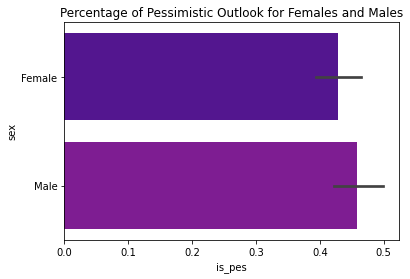

In [9]:
# print(sns.color_palette().as_hex())

#create barplot showing males vs females and their percentage of pessimism
ax = sns.barplot(y="sex", x="is_pes", data=train[train.sex != 'Refused']).set_title(
    label= "Percentage of Pessimistic Outlook for Females and Males")

# plt.savefig('images/fem_male_pessimism_percentage.png')

plt.show()

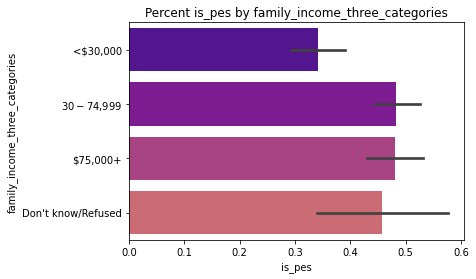

In [10]:
ax = sns.barplot(y="family_income_three_categories", x="is_pes", data=train).set_title(
label = 'Percent is_pes by family_income_three_categories')
plt.savefig('images/percent_is_pes_by_family_income.png')

In [11]:
def bar_graph_percent_pessimistic(df, x_feature, y_feature):
    # Derive title
    title = f"Percent {x_feature} by {y_feature}"
    # Build filename from title
    filename = 'images/' + title.replace(' ', '_').lower() + '.png'
    # Make the plot and set the title
    ax = sns.barplot(data = df, x = x_feature, y = y_feature).set_title(
    label=title)
    # Save the plot
    plt.savefig(filename)
    

### Beyond sex and income, Is education a factor in future pessimistic outlook?

In [12]:
pd.crosstab(df.highest_education_six_categories, df.is_pes, margins=True)

is_pes,0,1,All
highest_education_six_categories,,,
Associate's degree,120,81,201
College graduate/some post grad,287,229,516
Don't know/Refused,4,1,5
High school graduate,435,322,757
Less than high school,123,60,183
Postgraduate,184,179,363
"Some college, no degree",250,240,490
All,1403,1112,2515


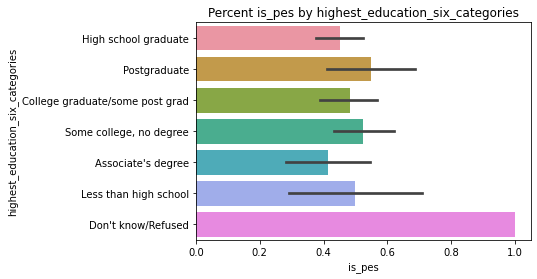

In [13]:
bar_graph_percent_pessimistic(train[train.family_income_three_categories == '$30-$74,999'], "is_pes", "highest_education_six_categories")


<a name='explore_takeaways'></a>
## Explore Takeaways

> - There a small differences in future outlook when considering sex, income and education.
> - While the small differences exist, they do not appear to be significant.
> - Through chi-squared testing, we verify that there is not a significant relationship between theses features and our target.
> - Even though they are not necessarily drivers of overall future outlook, the findings are still helpful in isolation.


<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

<a name='modeling'></a>
# Modeling & Evaluation
✓ _Plan_ ➜ ✓ _Acquire_ ➜ ✓ _Prepare_ ➜ ✓ _Explore_ ➜ 🟢 **Model** ➜ ☐ _Deliver_

> - We first have to choose a baseline to compare our models against.
> - The main models we will be using are Decision Tree, Random Forest, and K-Nearest Neighbor.
> - We will use different variations of our models until we determine one to have outperformed our baseline and to avoid overfitting or underfitting on the training data.
> - We will also be testing feature importance to see drives an individual's overall attitude.
> - Once we choose our best model, we will run it on our Out-of-sample dataset.

In [14]:
#Get dummy variables for Classification models
o = e.generate_and_return_obj(df)
o.X_train_dummies.head()

,qkey,weight,device_type_Mobile phone,device_type_Tablet,language_Spanish,form_Form 2,happen_general_The U.S. economy will be STRONGER,happen_general_The U.S. economy will be WEAKER,happen_health_Health care will be MORE affordable,happen_health_Refused,...,"registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed",registered_to_vote_nan,political_views_Liberal,political_views_Moderate,political_views_Refused,political_views_Very conservative,political_views_Very liberal,internet_access_Non Internet User,volunteer_Refused,volunteer_Yes
1859,201801113305,3.057078,1,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
96,191336,0.433484,0,0,0,1,0,1,0,1,...,1,0,1,0,0,0,0,0,0,0
420,668019,2.413983,0,0,0,1,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
1424,201801054651,0.362586,1,0,0,1,0,1,1,0,...,0,0,1,0,0,0,0,0,0,0
114,200943,0.303046,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [15]:
#We will turn off column truncation so that we can see the names of each model
pd.set_option('display.max_colwidth', None)

<a name='baseline'></a>
## Baseline
Let's set a baseline score to compare our models against.

In [16]:
# We use the mean value based off of our target variable
print(f'Baseline Accuracy: {(1.00 - round(o.y_train_dummies.mean(), 4))* 100}%')

Baseline Accuracy: 55.75%


We now have a baseline!

To evaluate our models, we will create a DataFrame to compare the performance of each model. 

In [17]:
# Create a dataframe to store and compare our models' performances
score_df = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df

,model_name,train_score,validate_score


<a name='decision_tree'></a>
## Decision Tree

In [18]:
# Thise function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
tree_list, tree_model_name_list = m.decision_tree_models(10)

In [19]:
# Run models based off specified parameters
# Append results to score_df
for model, name in zip(tree_list, tree_model_name_list):
    score_df = m.test_a_model(o.X_train_dummies, o.y_train_dummies, o.X_validate_dummies, o.y_validate_dummies, model, name, score_df)

In [20]:
score_df.sort_values(by = "validate_score", ascending = False)

,model_name,train_score,validate_score
2,decision_tree_depth_5,0.794744,0.738411
0,decision_tree_depth_3,0.750710,0.731788
1,decision_tree_depth_4,0.778409,0.730132
4,decision_tree_depth_7,0.882102,0.718543
3,decision_tree_depth_6,0.838068,0.710265
5,decision_tree_depth_8,0.923295,0.672185
6,decision_tree_depth_9,0.946733,0.670530


<a name='random_forest'></a>
## Random Forest

In [21]:
# This function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
forest_list, forest_name_list = m.random_forest_models(10, 10, 'including_all')

In [22]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df = m.test_a_model(o.X_train_dummies, o.y_train_dummies, o.X_validate_dummies, o.y_validate_dummies, model, name, score_df)

In [23]:
score_df.sort_values(by = 'validate_score', ascending = False).head(10)

,model_name,train_score,validate_score
59,including_all_features_random_forest_min_samples_leaf_8_depth_2,0.852273,0.799669
20,including_all_features_random_forest_min_samples_leaf_4_depth_3,0.811790,0.799669
51,including_all_features_random_forest_min_samples_leaf_7_depth_4,0.860085,0.793046
27,including_all_features_random_forest_min_samples_leaf_5_depth_0,0.772017,0.791391
62,including_all_features_random_forest_min_samples_leaf_8_depth_5,0.770597,0.791391
47,including_all_features_random_forest_min_samples_leaf_7_depth_0,0.799006,0.791391
15,including_all_features_random_forest_min_samples_leaf_3_depth_8,0.914062,0.789735
26,including_all_features_random_forest_min_samples_leaf_4_depth_9,0.757102,0.789735
66,including_all_features_random_forest_min_samples_leaf_8_depth_9,0.812500,0.789735
23,including_all_features_random_forest_min_samples_leaf_4_depth_6,0.885653,0.789735


<a name='knn'></a>
## K Nearest Neighbors

In [24]:
#This function takes in a neighbors amount 
# returns KNN parameters and corresponding names
k_neighbors_list, k_names_list = m.k_neighbors_models(10)

In [25]:
#Append results to score_df
for model, name in zip(k_neighbors_list, k_names_list):
    score_df = m.test_a_model(o.X_train_dummies, o.y_train_dummies, o.X_validate_dummies, o.y_validate_dummies, model, name, score_df)

In [26]:
score_df.sort_values(by = "validate_score", ascending = False).head()

,model_name,train_score,validate_score
59,including_all_features_random_forest_min_samples_leaf_8_depth_2,0.852273,0.799669
20,including_all_features_random_forest_min_samples_leaf_4_depth_3,0.811790,0.799669
51,including_all_features_random_forest_min_samples_leaf_7_depth_4,0.860085,0.793046
47,including_all_features_random_forest_min_samples_leaf_7_depth_0,0.799006,0.791391
27,including_all_features_random_forest_min_samples_leaf_5_depth_0,0.772017,0.791391


<a name='other_models'></a>
## Other Models

In [27]:
# We will test the performance of a series of extra models, listed below
extra_models_list = [LinearSVC(), LogisticRegression(), MultinomialNB()]

extra_model_names = ['linear_svc', 'logistic_regression', 'naive_bayes']

In [28]:
#Append results to score_df
for model, name in zip(extra_models_list, extra_model_names):
    score_df = m.test_a_model(o.X_train_dummies, o.y_train_dummies, o.X_validate_dummies, o.y_validate_dummies, model, name, score_df)

In [29]:
score_df.sort_values(by = "validate_score", ascending = False).head(10)

,model_name,train_score,validate_score
59,including_all_features_random_forest_min_samples_leaf_8_depth_2,0.852273,0.799669
20,including_all_features_random_forest_min_samples_leaf_4_depth_3,0.811790,0.799669
51,including_all_features_random_forest_min_samples_leaf_7_depth_4,0.860085,0.793046
27,including_all_features_random_forest_min_samples_leaf_5_depth_0,0.772017,0.791391
62,including_all_features_random_forest_min_samples_leaf_8_depth_5,0.770597,0.791391
47,including_all_features_random_forest_min_samples_leaf_7_depth_0,0.799006,0.791391
23,including_all_features_random_forest_min_samples_leaf_4_depth_6,0.885653,0.789735
50,including_all_features_random_forest_min_samples_leaf_7_depth_3,0.860085,0.789735
66,including_all_features_random_forest_min_samples_leaf_8_depth_9,0.812500,0.789735
26,including_all_features_random_forest_min_samples_leaf_4_depth_9,0.757102,0.789735


<a name='feature_importance'></a>
## Feature Importance

We will use our best performing model so far to perform feature engineering. By only using the most important features in our model, we may be able to improve our accuracy.

In [30]:
#Make model
rf_depth_8_leaf_3 = RandomForestClassifier(min_samples_leaf=3, max_depth=8)
#Fit Model
rf_depth_8_leaf_3.fit(o.X_train_dummies, o.y_train_dummies)

RandomForestClassifier(max_depth=8, min_samples_leaf=3)

In [31]:
#Create data frame of feature importances, using our selected model
feature_importances = pd.DataFrame(rf_depth_8_leaf_3.feature_importances_, index = o.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances = feature_importances.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances.columns.names = ['category']

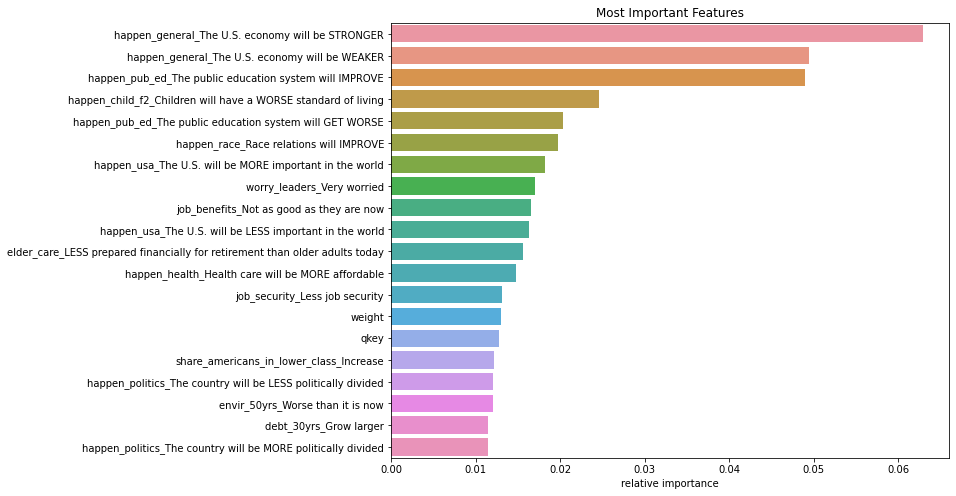

In [51]:
#Plot the most relevant features
plt.figure(figsize=(10,8))
relative_importances = sns.barplot(x=feature_importances['relative importance'][0:20], y=feature_importances.index[0:20]).set(title="Most Important Features")
# Save feature importance fig
plt.savefig('images/feature_importance.png')

### Feature Importance Takeaways
- Public Education and U.S. economics are major drivers of pessimism.
- Ones own job benefits, race relations, future standards of living, healthcare, and the country's world status follow closely behind in overall importance.

<a name='top'></a>
## Modeling with just the top features

### Modeling with just the top 30 features
We will attempt to create a more accurate model by using just the most important features in our dataset. Because Random Forest Classifier has proven itself to be the most accurate model on our data, we will continue to use Random Forest Classifier. 

In [33]:
#Select 30 most important features
top_thirty = feature_importances[0:30].index.to_list()

In [34]:
#Make new train, validate, and test datasets with just the thirty features
X_train_top_thirty = o.X_train_dummies[top_thirty]
X_validate_top_thirty = o.X_validate_dummies[top_thirty]
X_validate_top_thirty = o.X_validate_dummies[top_thirty]

In [35]:
#Get names of new Random Forest Models
forest_list, forest_name_list = m.random_forest_models(10, 10, 'thirty')

In [36]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df = m.test_a_model(X_train_top_thirty, o.y_train_dummies, X_validate_top_thirty, o.y_validate_dummies, model, name, score_df)

In [37]:
score_df.sort_values(by= "validate_score", ascending = False).head()

,model_name,train_score,validate_score
59,including_all_features_random_forest_min_samples_leaf_8_depth_2,0.852273,0.799669
20,including_all_features_random_forest_min_samples_leaf_4_depth_3,0.811790,0.799669
51,including_all_features_random_forest_min_samples_leaf_7_depth_4,0.860085,0.793046
133,thirty_features_random_forest_min_samples_leaf_8_depth_5,0.745028,0.793046
62,including_all_features_random_forest_min_samples_leaf_8_depth_5,0.770597,0.791391


### Modeling with just the top 40 features

In [38]:
#Select 40 most important features
top_forty = feature_importances[0:40].index.to_list()

In [39]:
#Make new train, validate, and test datasets with just forty features
X_train_top_forty = o.X_train_dummies[top_forty]
X_validate_top_forty = o.X_validate_dummies[top_forty]
X_validate_top_forty = o.X_validate_dummies[top_forty]

In [40]:
#Get the names of new Random Forest models
forest_list, forest_name_list = m.random_forest_models(10, 10, 'forty')

In [41]:
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df = m.test_a_model(X_train_top_thirty, o.y_train_dummies, X_validate_top_thirty, o.y_validate_dummies, model, name, score_df)

In [42]:
score_df.sort_values(by= "validate_score", ascending = False).head()

,model_name,train_score,validate_score
59,including_all_features_random_forest_min_samples_leaf_8_depth_2,0.852273,0.799669
20,including_all_features_random_forest_min_samples_leaf_4_depth_3,0.811790,0.799669
152,forty_features_random_forest_min_samples_leaf_4_depth_1,0.759943,0.796358
179,forty_features_random_forest_min_samples_leaf_6_depth_8,0.763494,0.794702
133,thirty_features_random_forest_min_samples_leaf_8_depth_5,0.745028,0.793046


<a name='model_comparison'></a>
## Model Comparison

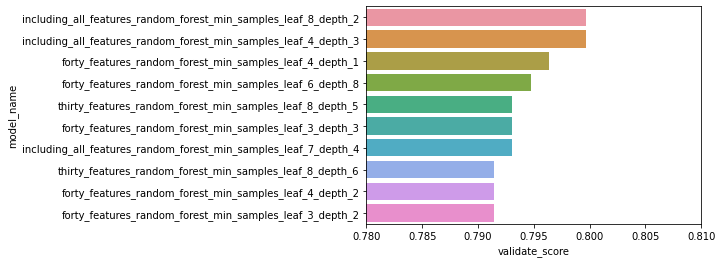

In [52]:
best_models = sns.barplot(y = "model_name",
                          x = 'validate_score',
                          data = score_df.sort_values(by = "validate_score", ascending = False).head(10),
                         ).set(xlim=(0.78, 0.81))

# This is to display the title, since it cannot be set on the obj
display(HTML('<center><h4>Model Comparison</h4></center>'))

# Save figure and model comparison
plt.savefig('images/model_comparison.png')

plt.show()

### Model Comparison Takeaways
Our best performing model is the Random Forest Classifier utilizing all features with a min samples leaf of 3 and a depth of 8. 

<a name='out_of_sample'></a>
## Out of Sample Testing

In [44]:
# Create the model
all_feats_rf = RandomForestClassifier(min_samples_leaf = 3, max_depth = 8)

# Fit the model
all_feats_rf.fit(o.X_train_dummies, o.y_train_dummies)

RandomForestClassifier(max_depth=8, min_samples_leaf=3)

In [45]:
# Create and store predictions from the test data
test_predictions = all_feats_rf.predict(o.X_test_dummies)

In [46]:
# Compare actual is_pes values with our predicted is_pess values
classification_report_test = pd.DataFrame(classification_report(o.y_test_dummies, test_predictions, output_dict = True)).T
classification_report_test

,precision,recall,f1-score,support
0,0.779310,0.804270,0.791594,281.000000
1,0.741784,0.711712,0.726437,222.000000
accuracy,0.763419,0.763419,0.763419,0.763419
macro avg,0.760547,0.757991,0.759015,503.000000
weighted avg,0.762748,0.763419,0.762837,503.000000


<a name='modeling_takeaways'></a>
## Modeling Takeaways

> - Big drivers of pessimism are public education and economics.
> - Some other main drivers are job benefits and job security, race relations, standards of living, healthcare, and the country's world status are also very important to adults.
> - We chose the most common result of the target column as our baseline with an accuracy of 55.75%.
> - We ran over 200 variations of Decision Tree, Random Forest, K-Nearest Neighbor, and other models.
> - Overall, the model with the best performances was the Random Forest.
    - `max_depth` = 8
    - `min_samples_leaf` = 3
> - Accuracy:
    - `train` (In-sample) = 92.05%
    - `validate` (Out-of-sample) = 80.46%
    - `test` (Out-of-sample) = 76.54%


<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

<a name='delivery'></a>
# Project Delivery
✓ _Plan_ ➜ ✓ _Acquire_ ➜ ✓ _Prepare_ ➜ ✓ _Explore_ ➜ ✓ _Model_ ➜ 🟢 **Deliver**

> - Currently we are achieving an Out-of-sample accuracy of ~76% on our `test` data and we believe with further feature engineering and hyper-parameter optimization we could achieve a higher accuracy. 

<a name='conclusion_and_next_steps'></a>

## Conclusion and Next Steps
> - While it appeared that there may have been a significant difference between the genders and their pessimisim, it was not result in this instance. 
> Additionally, our other potential observation, that there would be a significant difference in the pessimisim reletive to income, it was again not the result in this instance.
> - The next step is to continue finalizing the work and ensuring our work is throughly documented.
> - With more time we will continue examining multiple different feature combinations and test for significance from these observations.

<a name='replication'></a>
## Project Replication

> - Statistical data can be downloaded from <a href="https://www.kaggle.com/shankanater/american-trends-panel-pewresearch/download">here</a>.
> - You can read the SPSS Statistic data file with `pandas.read_spss("ATP W41.sav")`

<a name='data_use'></a>
## Data Use Agreements

> - The source of the data with express reference to the center in accordance with the following citation: “Pew Research Center’s American Trends Panel”
> - Any hypothesis, insight and or result within this project in no way implies or suggests as attributing a particular policy or lobbying objective or opinion to the Center, and
> - “The opinions expressed herein, including any implications for policy, are those of the author and not of Pew Research Center.”
> - Information on The American Trends Panel (ATP) can be found at <a href="https://www.pewresearch.org/our-methods/u-s-surveys/the-american-trends-panel/">The American Trends Panel</a>
> - More information on these user agreements can be found at <a href="https://www.pewresearch.org/about/terms-and-conditions/">Pew Research</a>.



<div style="text-align: right"><a href='#toc'>Table of Contents</a></div>
<hr style="border-top: 10px groove tan; margin-top: 1px; margin-bottom: 1px"></hr>

In [47]:
%%html
<style>
table {margin-left: 0 !important;}
</style>